In [ ]:
import pandas as pd
pollution = pd.read_csv("updated_pollution_dataset.csv")
pollution.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:


X = pollution.drop(columns=["Air Quality"])
Y = pollution["Air Quality"]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## **☁ ML MODELS:**
# 1. LOGISTIC REGRESSION (LR)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PERFORMANCE of LR
Accuracy: 0.751
F1 Score: 0.7463395764126738
Recall: 0.751
Precision: 0.7436382627937637
              precision    recall  f1-score   support

        Good       0.97      0.96      0.97       409
   Hazardous       0.44      0.38      0.41       111
    Moderate       0.74      0.82      0.77       294
        Poor       0.44      0.41      0.42       186

    accuracy                           0.75      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.74      0.75      0.75      1000



<Axes: >

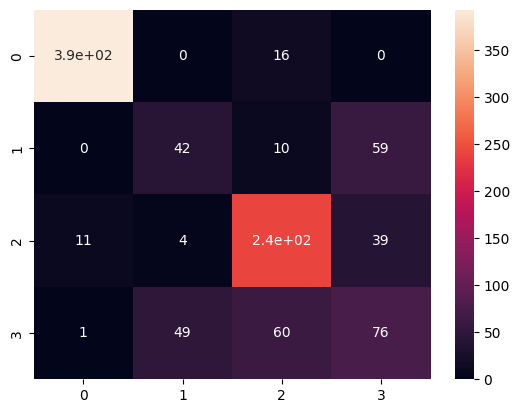

In [ ]:
modelLR = LogisticRegression(multi_class="multinomial", solver="lbfgs")
modelLR.fit(X_train, Y_train)
Y_pred = modelLR.predict(X_test)
accuracyLR = accuracy_score(Y_test, Y_pred)
f1scoreLR = f1_score(Y_test, Y_pred, average="weighted")

print("PERFORMANCE of LR")
print("Accuracy:", accuracyLR)
print("F1 Score:", f1scoreLR)
print("Recall:", recall_score(Y_test, Y_pred, average="weighted"))
print("Precision:", precision_score(Y_test, Y_pred, average="weighted"))
print(classification_report(Y_test, Y_pred))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

# **☁ ML MODELS:**

#   2. DECISION TREE (DT)

PERFORMANCE of DT
Accuracy: 0.902
F1 Score: 0.9025065013674987
Recall: 0.902
Precision: 0.9042121178874093
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       409
   Hazardous       0.73      0.84      0.78       111
    Moderate       0.92      0.93      0.92       294
        Poor       0.77      0.73      0.75       186

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000

{'max_depth': 11}


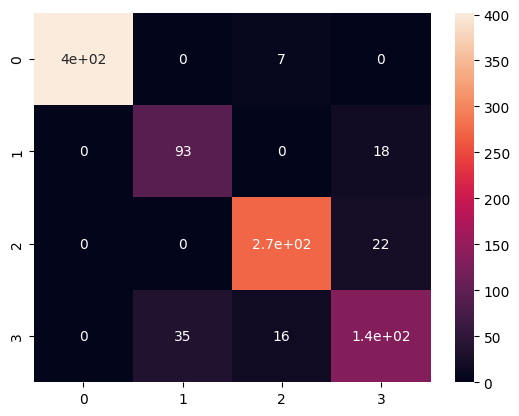

In [ ]:
modelDT = DecisionTreeClassifier(random_state=42, max_depth=5)
modelDT.fit(X_train, Y_train)
Y_pred = modelDT.predict(X_test)
accuracyDT = accuracy_score(Y_test, Y_pred)
f1scoreDT = f1_score(Y_test, Y_pred, average="weighted")

print("PERFORMANCE of DT")
print("Accuracy:", accuracyDT)
print("F1 Score:", f1scoreDT)
print("Recall:", recall_score(Y_test, Y_pred, average="weighted"))
print("Precision:", precision_score(Y_test, Y_pred, average="weighted"))
print(classification_report(Y_test, Y_pred))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

Tree_params = {'max_depth': [1,3,5,7,9,11]}
Masterclf = GridSearchCV(modelDT, Tree_params, scoring='accuracy')
Masterclf.fit(X_train, Y_train)
print(Masterclf.best_params_)

# **☁ ML MODELS:**
# 3. Random Forest (RF)

PERFORMANCE of RF
Accuracy: 0.96
F1 Score: 0.9599869595058339
Recall: 0.96
Precision: 0.9601196977092555
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.88      0.90       111
    Moderate       0.97      0.97      0.97       294
        Poor       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

{'n_estimators': 9}


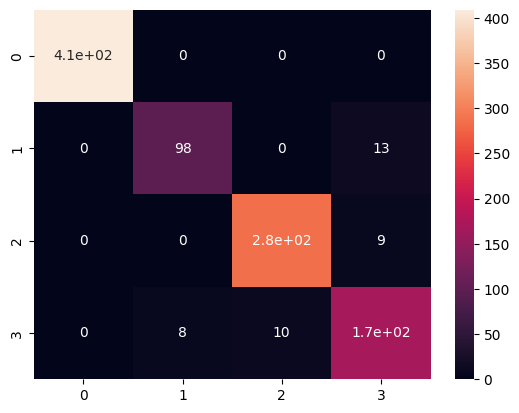

In [ ]:
modelRF = RandomForestClassifier(random_state=42, n_estimators=100)
modelRF.fit(X_train, Y_train)
Y_pred = modelRF.predict(X_test)
accuracyRF = accuracy_score(Y_test, Y_pred)
f1scoreRF = f1_score(Y_test, Y_pred, average="weighted")

print("PERFORMANCE of RF")
print("Accuracy:", accuracyRF)
print("F1 Score:", f1scoreRF)
print("Recall:", recall_score(Y_test, Y_pred, average="weighted"))
print("Precision:", precision_score(Y_test, Y_pred, average="weighted"))
print(classification_report(Y_test, Y_pred))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

forest_params = {'n_estimators':[1,3,5,7,9]}

clf = GridSearchCV(modelRF, forest_params, scoring='accuracy')

clf.fit(X_train, Y_train)
print(clf.best_params_)